In [1]:
import pandas as pd
training_data = pd.read_csv('ex6data3_training.csv',header=None)
cv_data = pd.read_csv('ex6data3_cv.csv',header=None)
print(training_data.head())
print(cv_data.head())

          0         1  2
0 -0.158986  0.423977  1
1 -0.347926  0.470760  1
2 -0.504608  0.353801  1
3 -0.596774  0.114035  1
4 -0.518433 -0.172515  1
          0         1  2
0 -0.353062 -0.673902  0
1 -0.227126  0.447320  1
2  0.092898 -0.753524  0
3  0.148243 -0.718473  0
4 -0.001512  0.162928  0


In [2]:
from matplotlib import pyplot as plt

def plotData(data,title):
    positive_examples = data[data[2]==1]
    negative_examples = data[data[2]==0]
    
    plt.plot(positive_examples[0],positive_examples[1],'k+',
             negative_examples[0],negative_examples[1],'yo')
    plt.title(title)
    plt.show()

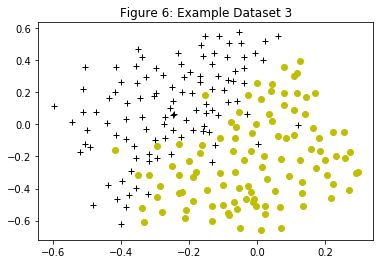

In [3]:
# visualizing the trainning data
plotData(training_data,"Figure 6: Example Dataset 3")

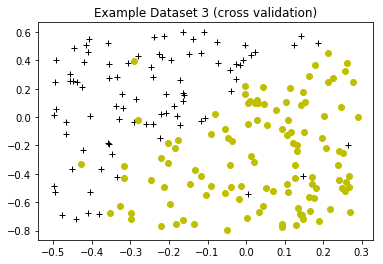

In [4]:
# visualizing the cross validation data
plotData(cv_data, "Example Dataset 3 (cross validation)")

In [28]:
from sklearn import svm
import numpy as np

X = training_data.as_matrix([0,1])
y = training_data[2]
Xval = cv_data.as_matrix([0,1])
yval = cv_data[2]

def calc_prediction_error(y_predictions, y):
    return np.mean(y_predictions!= y)

params = [0.01,0.03,0.1,0.3,1,3,10,30]
C = 0
sigma = 0
cmax_error = 1000000

for ci in params:
    for si in params:
        gamma = 1.0/(2.0*si*si)
        
        svm_model = svm.SVC(C=ci,gamma=gamma)
        svm_reg = svm_model.fit(X,y)

        y_predict = svm_reg.predict(Xval)

        predictions_error = calc_prediction_error(y_predict, yval)
        
        # print(ci, si,gamma, predictions_error)
        
        if predictions_error < cmax_error:
            C = ci
            sigma = si
            cmax_error = predictions_error

print(C,sigma,cmax_error)

1 0.1 0.035


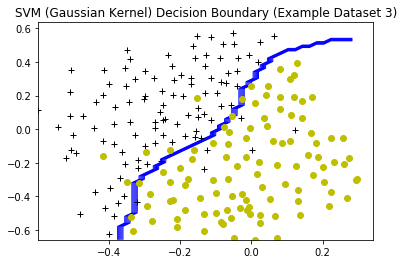

In [29]:
def make_meshgrid(x,y,h=0.02):
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                         np.arange(y_min,y_max,h))
    
    return xx,yy

def plot_contours(clf, xx, yy,title):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx,yy,Z,colors='b', linewidths=1)
    plotData(training_data,title)
    
X0,X1 = X[:,0],X[:,1]
xx, yy = make_meshgrid(X0,X1)

gamma = 1.0 / (2*sigma*sigma)
svm_model = svm.SVC(C=C,gamma=gamma)
reg = svm_model.fit(X,y)

plot_contours(reg,xx,yy,"SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)")
